# Bivariate Analysis
## - Investigate relationships between two features <br> -Include scatter plots, correlation matrices, or other relevant visualizations

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("../data/regional_multivariate_data.csv")

df['date'] = pd.to_datetime(df['date'])
df.head()

,region,date,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,new_hospitalized_patients,cumulative_hospitalized_patients,current_hospitalized_patients,current_intensive_care_patients,...,income_support,debt_relief,public_information_campaigns,testing_policy,contact_tracing,facial_coverings,vaccination_policy,stringency_index,minimum_temperature_celsius,maximum_temperature_celsius
0,East North Central,2020-03-05,27.0,0.0,106.0,1.0,0.0,65586.95,3013.05,755.17,...,0.0,0.0,1.2,1.0,1.0,0.0,0.0,17.778,-7.461111,14.244444
1,East North Central,2020-03-06,41.0,0.0,147.0,1.0,0.0,63514.28,3106.85,784.39,...,0.0,0.0,1.2,1.0,1.0,0.0,0.0,17.778,-5.494444,12.827778
2,East North Central,2020-03-07,49.0,0.0,196.0,1.0,0.0,59644.23,3025.83,746.22,...,0.0,0.0,1.2,1.0,1.0,0.0,0.0,17.778,-11.422222,12.222222
3,East North Central,2020-03-08,64.0,0.0,260.0,1.0,0.0,68552.01,2667.92,667.38,...,0.0,0.0,1.2,1.0,1.0,0.0,0.0,17.778,-2.700000,18.938889
4,East North Central,2020-03-09,125.0,0.0,385.0,1.0,0.0,84213.22,2735.39,716.99,...,0.0,0.0,1.2,1.0,1.0,0.0,0.0,17.778,1.861111,18.011111


<AxesSubplot:>

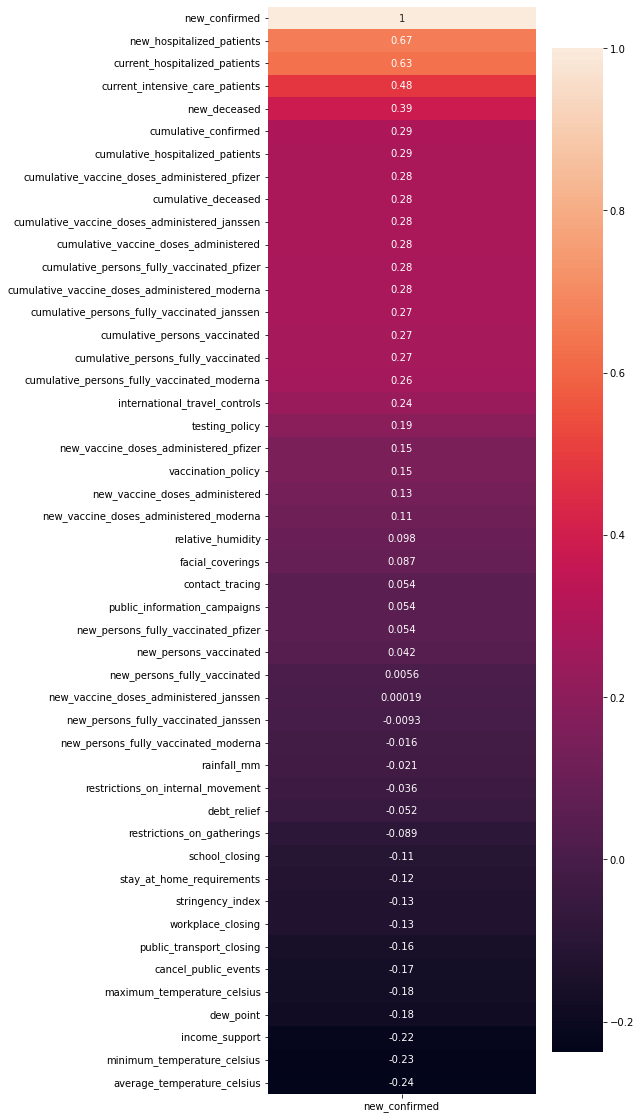

In [10]:
numeric_data = df.iloc[:, 2:50]
plt.figure(figsize=(6, 20))
sns.heatmap(numeric_data.corr()[['new_confirmed']].sort_values(by = 'new_confirmed', ascending = False), annot = True)

## Few features have moderate or strong correlations with new_confirmed

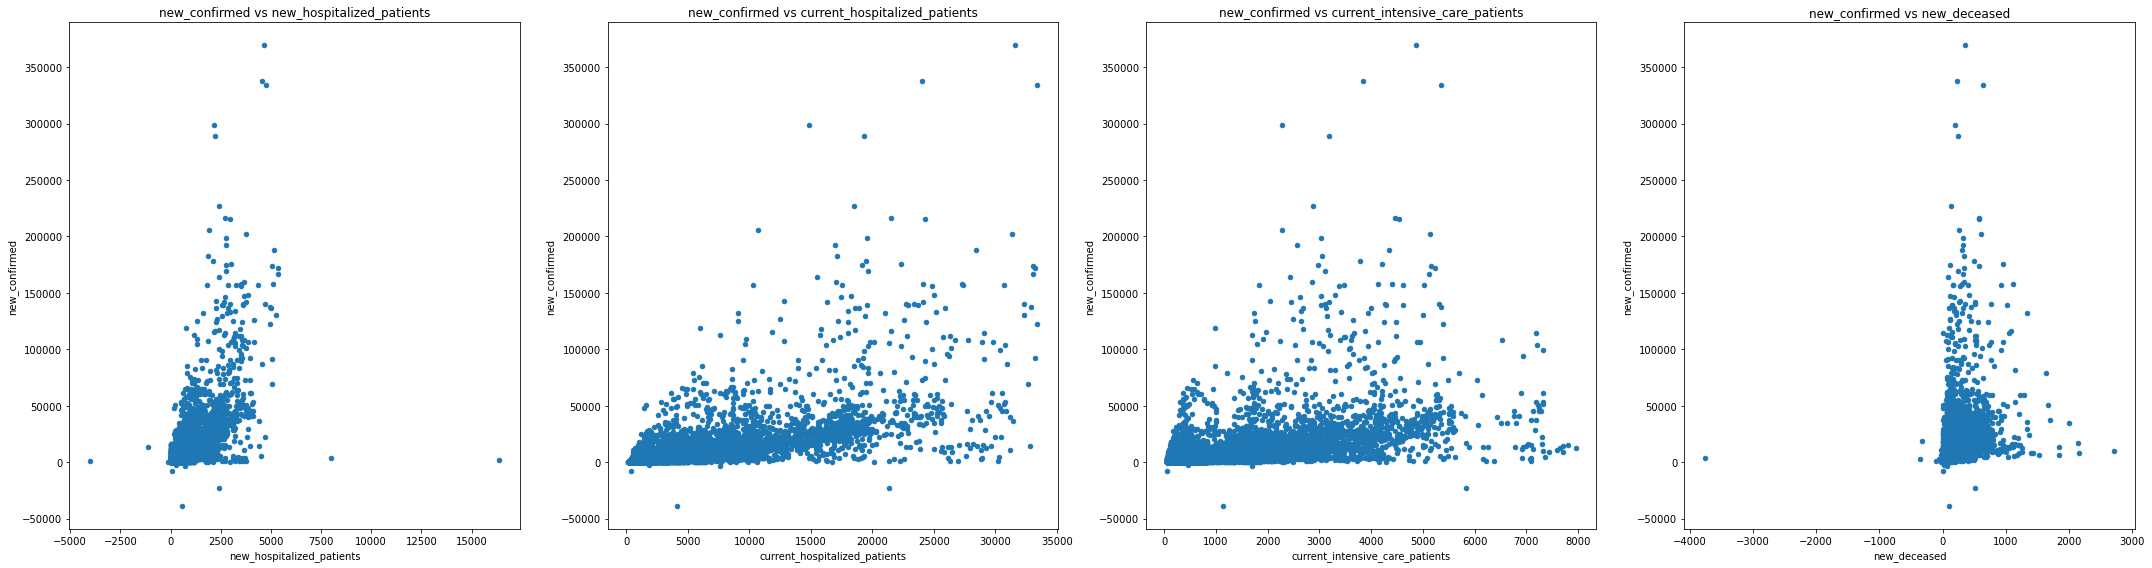

In [11]:
correlated_features = ['new_hospitalized_patients', 'current_hospitalized_patients', 'current_intensive_care_patients', 'new_deceased']
fig, axes = plt.subplots(nrows=1, ncols=len(correlated_features), figsize=(30, 8))

for i, feature in enumerate(correlated_features):
    df.plot(kind='scatter', x=feature, y='new_confirmed', ax=axes[i])
    axes[i].set_title(f'new_confirmed vs {feature}')
plt.tight_layout()
plt.show()

## Log transformations improve visibility - four features are positively correlated with new_confirmed

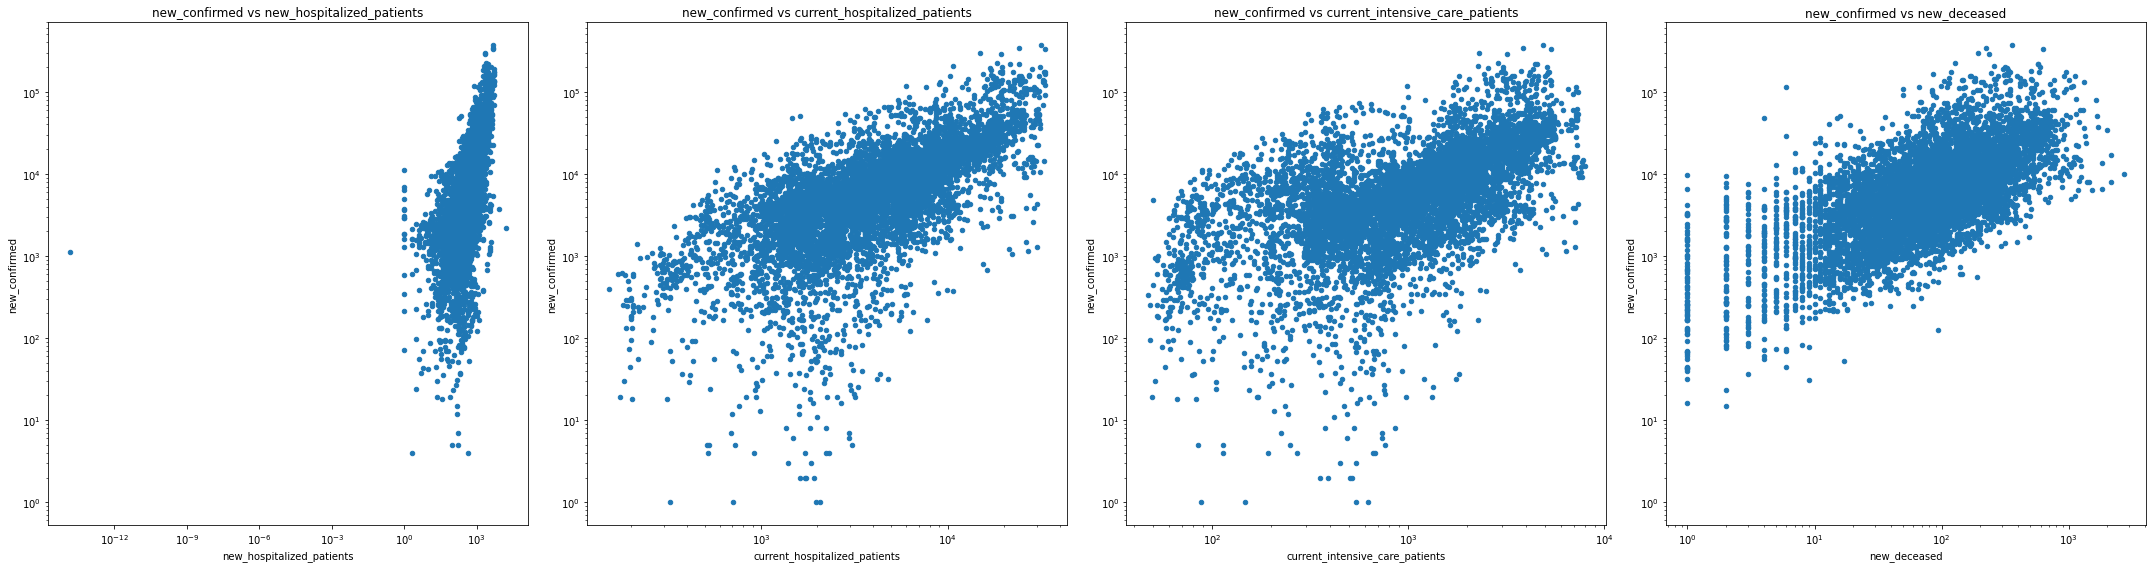

In [12]:
correlated_features = ['new_hospitalized_patients', 'current_hospitalized_patients', 'current_intensive_care_patients', 'new_deceased']
fig, axes = plt.subplots(nrows=1, ncols=len(correlated_features), figsize=(30, 8))

for i, feature in enumerate(correlated_features):
    df.plot(kind='scatter', x=feature, y='new_confirmed', ax=axes[i], logx = True, logy = True)
    axes[i].set_title(f'new_confirmed vs {feature}')
plt.tight_layout()
plt.show()

# Exploring Log Transformations

<AxesSubplot:>

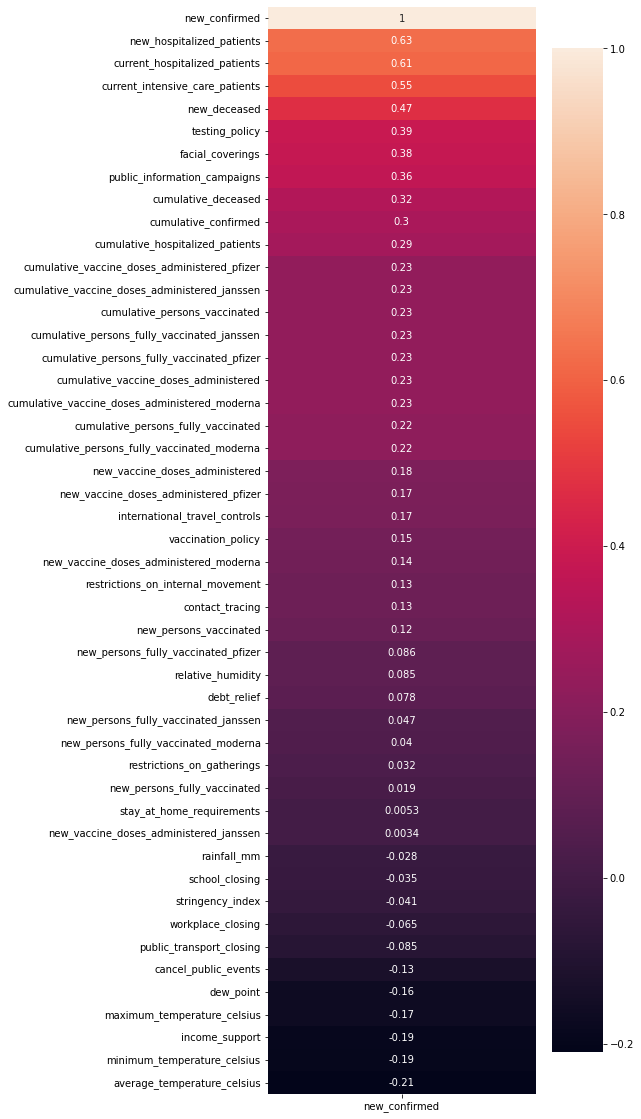

In [13]:

log_numeric_features = numeric_data.copy()
log_numeric_features['new_confirmed'] = np.log(log_numeric_features['new_confirmed'])
plt.figure(figsize=(6, 20))
sns.heatmap(log_numeric_features.corr()[['new_confirmed']].sort_values(by = 'new_confirmed', ascending = False), annot = True)

## Transformation of only new_confirmed reveals little new information, no new significant features

<AxesSubplot:>

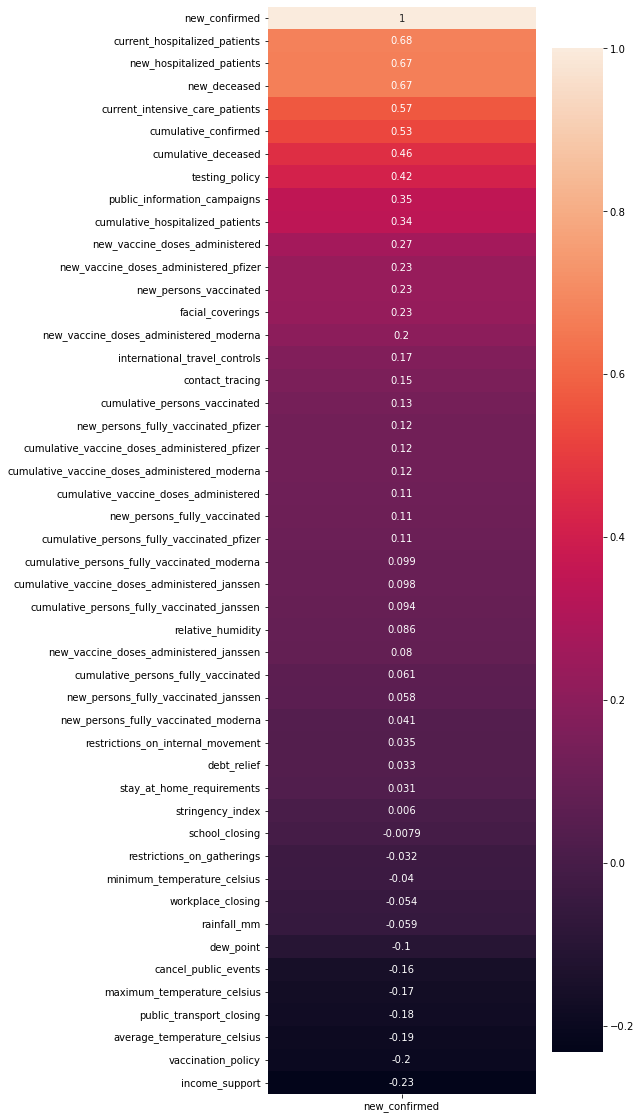

In [14]:
log_numeric_features = np.log(numeric_data)
plt.figure(figsize=(6, 20))
sns.heatmap(log_numeric_features.corr()[['new_confirmed']].sort_values(by = 'new_confirmed', ascending = False), annot = True)

## Transformation of all numeric features to log improves the correlation of the previoulsy discovered significantly correlated features to new_confirmed. This also reveals 3 new features (cumulative_confirmed, cumulative_deceased, and cumulative_hospitalized_patients) that cross the significance threshold (abs > 0.3). However, since they are all cumulative statistics who's "new_" features are already significant, we won't explore these new featuers at the moment.

<AxesSubplot:>

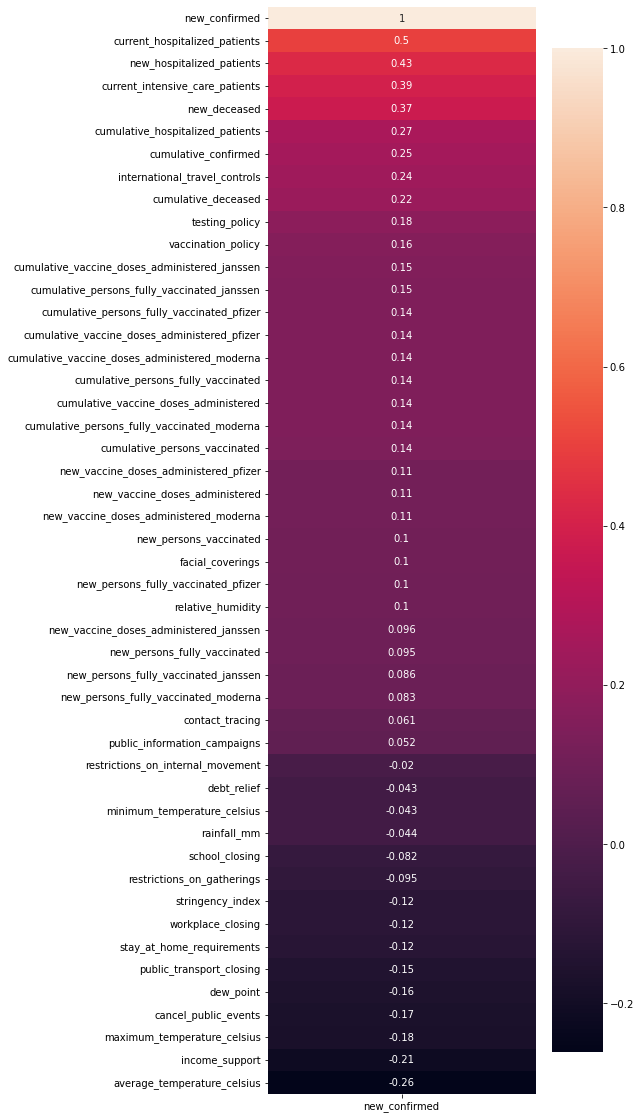

In [15]:
log_features_only = numeric_data.copy()
columns_to_transform = log_features_only.columns.difference(['new_confirmed'])
log_features_only[columns_to_transform] = log_features_only[columns_to_transform].apply(np.log1p)
plt.figure(figsize=(6, 20))
sns.heatmap(log_features_only.corr()[['new_confirmed']].sort_values(by = 'new_confirmed', ascending = False), annot = True)